<a href="https://colab.research.google.com/github/Asim927/Task-12/blob/main/Task_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("Mall_Customers.csv")

print(df.head())
print(df.columns)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
df = df.drop("CustomerID", axis=1)


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


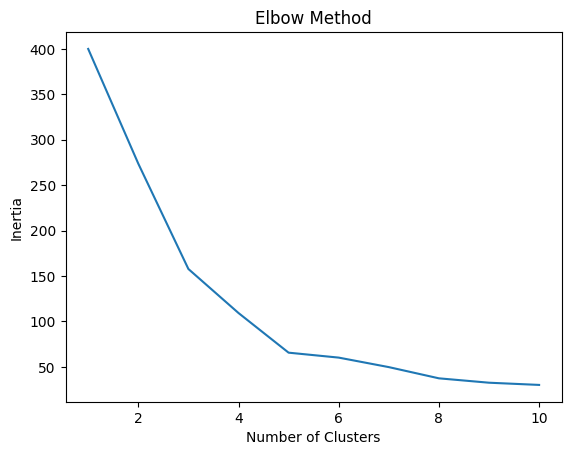

In [6]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [8]:
df['Cluster'] = clusters

print(df.head())


    Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        4
1    Male   21                  15                      81        2
2  Female   20                  16                       6        4
3  Female   23                  16                      77        2
4  Female   31                  17                      40        4


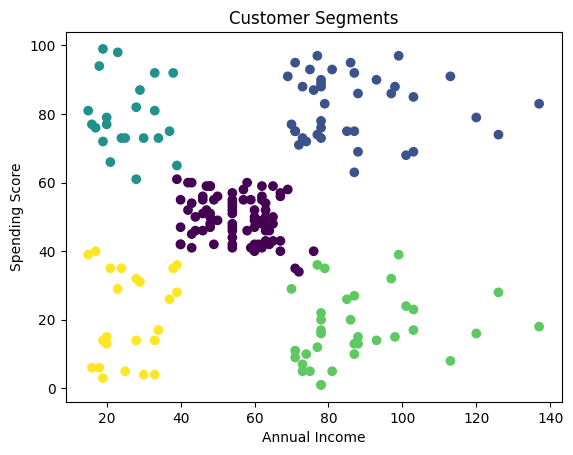

In [9]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()


In [10]:
df.to_csv("Mall_Customers_Segmented.csv", index=False)
